In [1]:
#Used for data manipulation
import numpy as np
import xarray as xr
from scipy import stats 
import pandas as pd
import math as mt
#Others
import time
#Data visualization
import datetime
from dateutil.rrule import rrule, DAILY, HOURLY
import matplotlib.font_manager as font
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from xhistogram.xarray import histogram


In [2]:
#Time to get the data from AWS; download locally***
file = 'gdp_v2.00.nc'
#url_path = 'https://noaa-oar-hourly-gdp-pds.s3.amazonaws.com/latest/'
#ds = xr.open_dataset(url_path+file+'#mode=bytes')
url_path = '/Users/19082/Desktop/Drifter/'
ds = xr.open_dataset(url_path+file)

In [3]:
ds

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 ...
    longitude              (obs) float32 ...
    latitude               (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/53)
    rowsize                (traj) int64 ...
    location_type          (traj) bool ...
    WMO                    (traj) int32 ...
    expno                  (traj) int32 ...
    deploy_date            (traj) datetime64[ns] ...
    deploy_lon             (traj) float32 ...
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-01-14T11:16:01.998226
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

Obtain and plot SST Data:

In [4]:
bin1 = '2000-09-03'
bin2 = '2001-03-03'

In [5]:
data_subset_sst = ds[['time']].where((ds.time > np.datetime64(bin1)) & 
                                     (ds.time < np.datetime64(bin2)) & 
                                     (ds.flg_sst ==5), drop=True)

Text(0.5, 0, '')

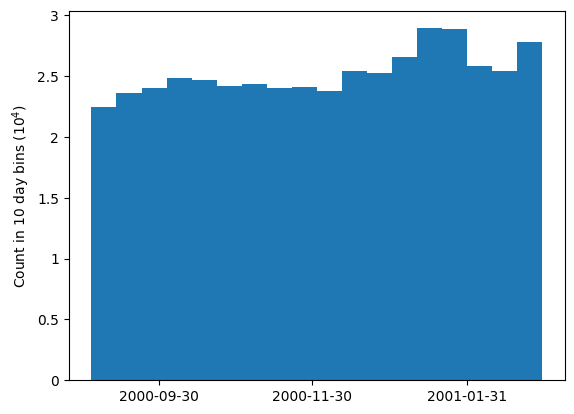

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
xticks = pd.date_range(bin1, bin2, freq= "2M") 
bins = pd.date_range(bin1, bin2, freq= "10D")  # 2 year bins
data_subset_sst['time'].plot.hist(xticks = xticks, bins = bins)
scale_y = 1e4
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Count in 10 day bins (10$^4$)")
ax.set_xlabel("")


Obtain and plot sst2 data:

In [11]:
data_subset_sst2 = ds[['time']].where((ds.time > np.datetime64(bin1)) & 
                                      (ds.time < np.datetime64(bin2)) & 
                                      (ds.flg_sst2 ==5), drop=True)

Text(0.5, 0, '')

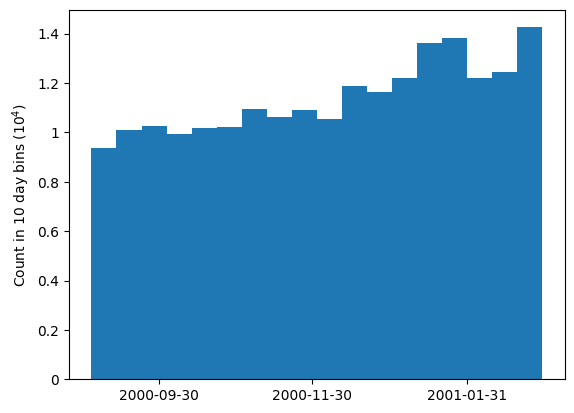

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
xticks = pd.date_range(bin1, bin2, freq= "2M") 
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
data_subset_sst2['time'].plot.hist(xticks = xticks, bins = bins)
scale_y = 1e4
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Count in 10 day bins (10$^4$)")
ax.set_xlabel("")

Obtain and plot pos+velo data:

In [13]:
data_subset_vn = ds[['time']].where((ds.time > np.datetime64(bin1)) & 
                                            (ds.time < np.datetime64(bin2)) &
                                            (ds.vn.isnull() == False), drop=True)

Text(0.5, 0, '')

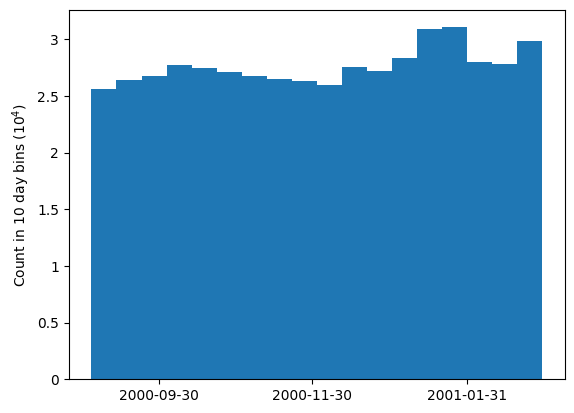

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
xticks = pd.date_range(bin1, bin2, freq= "2M") #
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
data_subset_vn['time'].plot.hist(xticks = xticks, bins = bins)
scale_y = 1e4
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Count in 10 day bins (10$^4$)")
ax.set_xlabel("")

Text(0.5, 0, '')

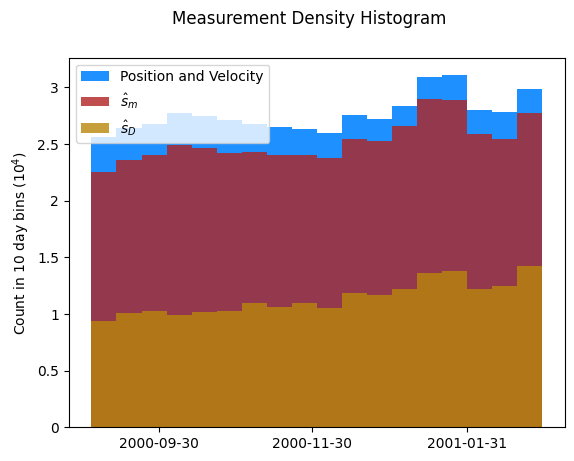

In [36]:
xticks = pd.date_range(bin1, bin2, freq= "2M") # xticks
fig = plt.figure()
ax = fig.add_subplot()
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
data_subset_vn['time'].plot.hist(xticks = xticks, bins = bins, label = "Position and Velocity", color = "dodgerblue")
data_subset_sst['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{m}$", color = "firebrick", alpha = 0.8)
data_subset_sst2['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{D}$", color = "darkgoldenrod", alpha = 0.8)
scale_y = 1e4
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
plt.suptitle("Measurement Density Histogram")
plt.legend(loc='upper left')
ax.set_ylabel("Count in 10 day bins (10$^4$)")
ax.set_xlabel("")


Text(0.5, 0, '')

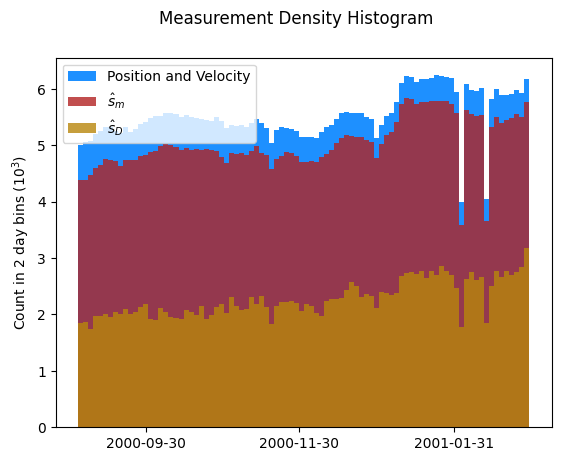

In [39]:
xticks = pd.date_range(bin1, bin2, freq= "2M") # xticks
fig = plt.figure()
ax = fig.add_subplot()
bins = pd.date_range(bin1, bin2, freq= "2D")  # 10 day bins
data_subset_vn['time'].plot.hist(xticks = xticks, bins = bins, label = "Position and Velocity", color = "dodgerblue")
data_subset_sst['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{m}$", color = "firebrick", alpha = 0.8)
data_subset_sst2['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{D}$", color = "darkgoldenrod", alpha = 0.8)
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
plt.suptitle("Measurement Density Histogram")
plt.legend(loc='upper left')
ax.set_ylabel("Count in 2 day bins (10$^3$)")
ax.set_xlabel("")
